손지우

# 1번 문제. FCB Exercise 3.3

## Import Library

In [48]:
import numpy as np
import scipy.stats as st
from scipy.stats import nbinom
from scipy.stats import gamma
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Input Data

In [2]:
ya = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
yb = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

In [12]:
num_a = len(ya)
num_b = len(yb)

sum_a = sum(ya)
sum_b = sum(yb)

## a) posterior distributions, mean, variances, 95% CI for $\theta_A, \theta_B$

In [45]:
# prior 
alpha_a = 120
beta_a = 10

# posterior distribution
postA = gamma(alpha_a+sum_a, scale=1/(beta_a+num_a))
print('posterior distribution of thetaA with parameter', alpha_a+sum_a, 'and', (beta_a+num_a))

# posterior mean
postMean_a = (alpha_a+sum_a)/(beta_a+num_a)
print('posterior mean is of thetaA', postMean_a)

# posterior variance
postVar_a = (alpha_a+sum_a)/(beta_a+num_a)**2
print('posterior variance is of thetaA', postVar_a)

# posterior 95% CI
postCI_a = gamma.ppf([0.025,0.975], alpha_a+sum_a, scale=1/(beta_a+num_a))
print('posterior 95% CI is of thetaA', postCI_a)

posterior distribution of thetaA with parameter 237 and 20
posterior mean is of thetaA 11.85
posterior variance is of thetaA 0.5925
posterior 95% CI is of thetaA [10.38923819 13.40544833]


In [44]:
# prior  
alpha_b = 120
beta_b = 10

# posterior distribution
postB = gamma(alpha_b+sum_b, scale=1/(beta_b+num_b))
print('posterior distribution of thetaB with parameter', alpha_b+sum_b, 'and', (beta_b+num_b))

# posterior mean
postMean_b = (alpha_a+sum_b)/(beta_a+num_b)
print('posterior mean of thetaB is', postMean_b)

# posterior variance
postVar_b = (alpha_a+sum_b)/(beta_b+num_b)**2
print('posterior variance of thetaB is', postVar_b)

# posterior 95% CI
postCI_b = gamma.ppf([0.025,0.975], alpha_b+sum_b, scale=1/(beta_b+num_b))
print('posterior 95% CI of thetaB is', postCI_b)

posterior distribution of thetaB with parameter 233 and 23
posterior mean of thetaB is 10.130434782608695
posterior variance of thetaB is 0.44045368620037806
posterior 95% CI of thetaB is [ 8.87132888 11.47187635]


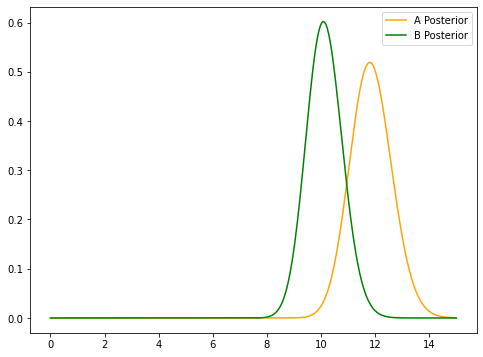

In [50]:
thetas = np.linspace(0, 15, 300)
plt.figure(figsize=(8, 6))
plt.plot(thetas, st.gamma(alpha_a+sum_a, scale=1/(beta_a+num_a)).pdf(thetas), label='A Posterior', color='orange')
plt.plot(thetas, st.gamma(alpha_b+sum_b, scale=1/(beta_b+num_b)).pdf(thetas), label='B Posterior', color='green')
plt.legend()
plt.show()

## b) posterior expectation of $\theta_B \text{ ~ } gamma(12\times n_0, n_0) \text{ where } n_0 \in \{1,2,...,50\}$

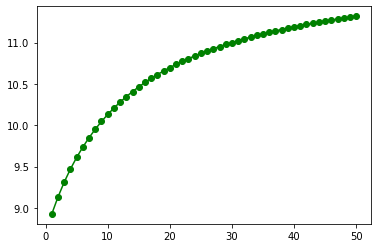

In [56]:
n0 = np.linspace(1,50)
postExp_b = (12*n0+sum_b)/(n0+num_b)
plt.plot(n0, postExp_b, marker='o', c='green')
plt.show()

## c) Should knowledge about population A tell us anything about population B? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A) \times p(\theta_B)$

A와 B의 사전 평균이 같다는 점 외에는 특별한 영향을 준 것은 없어보인다. 그래서그런지 약한 prior가 주어져있다. 결론적으로, 독립이라고 보아도 무방할 것이다.